In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
import json

def load_json(file_path):
    try:
        with open(file_path, "r") as file:
            data = pd.read_json(file)
            print(f"Successfully loaded data from {file_path}")
            return data
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")


In [18]:
df = load_json("lowes_crawler/data/lowes/lowes_2024-11-21_08-04-41.json")

Successfully loaded data from lowes_crawler/data/lowes/lowes_2024-11-21_08-04-41.json


In [19]:
# Check for duplicate items
duplicate_items = df[df["item_id"].duplicated()]["item_id"].unique()
print("Duplicate item_ids:", duplicate_items)

Duplicate item_ids: []


In [20]:
# Check for null values
print("Null values in dataset:")
df.isnull().sum()

Null values in dataset:


item_id                 0
store_number            0
zip_code                0
date                    0
url                     0
model_number            0
brand                   2
price_hidden_in_cart    0
price                   0
dtype: int64

In [21]:
# Handle missing brand values by filling with "Unknown"
df["brand"] = df["brand"].fillna("Unknown")

In [22]:
# Confirm null brand values were filled
df.isnull().sum()

item_id                 0
store_number            0
zip_code                0
date                    0
url                     0
model_number            0
brand                   0
price_hidden_in_cart    0
price                   0
dtype: int64

In [23]:
# Price distribution
df["price"].describe()

count    146.000000
mean      55.383082
std       24.351363
min       18.970000
25%       37.980000
50%       50.540000
75%       68.980000
max      174.700000
Name: price, dtype: float64

In [24]:
# Identify Price Outliers
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

df[(df["price"] < (Q1 - 1.5 * IQR)) | (df["price"] > (Q3 + 1.5 * IQR))]

,item_id,store_number,zip_code,date,url,model_number,brand,price_hidden_in_cart,price
44,5012907389,416,28278,2024-11-21 13:05:42.471954+00:00,https://www.lowes.com/pd/Puleo-International-2...,305-1390A-W30,Puleo International,False,174.7
103,5012907183,416,28278,2024-11-21 13:06:58.348723+00:00,https://www.lowes.com/pd/Puleo-International-2...,305-1291A-W30,Puleo International,False,174.7


In [25]:
# How many wreaths are there by brand?
print("Wreaths by Brand:\n")
df["brand"].value_counts()

Wreaths by Brand:



brand
Nearly Natural           40
Northlight               35
Worth Imports            35
National Tree Company    14
Sullivans                 9
Glitzhome                 4
Gerson International      2
Puleo International       2
Haute Decor               2
Unknown                   2
Fraser Hill Farm          1
Name: count, dtype: int64

In [26]:
# What is the price range for wreaths?
wreaths_price_range_min = df["price"].min()
wreaths_price_range_max = df["price"].max()
print(f"Wreaths price range: ${wreaths_price_range_min} - ${wreaths_price_range_max}")

Wreaths price range: $18.97 - $174.7


In [27]:
# Price Range by Brand
print("Price Range of Wreaths by Brand")
df.groupby("brand")["price"].agg(["min", "max"])

Price Range of Wreaths by Brand


,min,max
brand,,
Fraser Hill Farm,40.16,40.16
Gerson International,45.00,53.98
Glitzhome,30.48,63.98
Haute Decor,69.99,69.99
National Tree Company,39.98,95.64
Nearly Natural,30.86,90.77
Northlight,23.98,95.01
Puleo International,174.70,174.70
Sullivans,26.98,80.98


In [28]:
# What is the average price for wreaths by brand?
print("Average Price of Wreaths by Brand:\n")
df.groupby("brand")["price"].mean().round(2)

Average Price of Wreaths by Brand:



brand
Fraser Hill Farm          40.16
Gerson International      49.49
Glitzhome                 42.53
Haute Decor               69.99
National Tree Company     60.58
Nearly Natural            59.01
Northlight                60.30
Puleo International      174.70
Sullivans                 37.09
Unknown                   43.99
Worth Imports             44.19
Name: price, dtype: float64

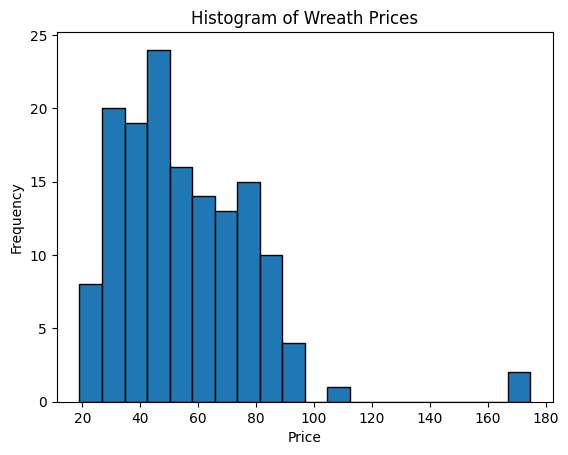

In [29]:
# Histogram of product prices
plt.hist(df["price"], bins=20, edgecolor="black")
plt.title("Histogram of Wreath Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [30]:
# Top 5 Most Expensive Wreaths
print("Top 5 Most Expensive Wreaths")
df.nlargest(5, "price")[["item_id", "brand", "price"]]

Top 5 Most Expensive Wreaths


,item_id,brand,price
44,5012907389,Puleo International,174.70
103,5012907183,Puleo International,174.70
62,5014595005,Worth Imports,109.00
122,5013935241,National Tree Company,95.64
83,5015205625,Northlight,95.01
